# Introdução ao Statsmodels

Statsmodels é um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração estatística de dados. Uma extensa lista de estatísticas de resultados estão disponíveis para cada estimador. Os resultados são testados em relação aos pacotes estatísticos existentes para garantir que estejam corretos. O pacote é liberado sob a licença BSD modificada de código aberto (3 cláusulas). A documentação on-line está hospedada em <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. A versão de modelos de estatísticas utilizada no desenvolvimento deste curso é 0.9.0.

<div class="alert alert-info"><h3>Para leitura suplementar:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>

Vamos passar por um exemplo muito simples de usar Statsmodels!

### Realizar importações padrão e carregar o conjunto de dados
Para esses exercícios, usaremos um conjunto de dados de macroeconomia incorporado para statsmodels:

<pre><strong>Dados Macroeconômicos dos EUA de 1959Q1 - 2009Q3</strong>
Numero de observações - 203
Numero de variaveis - 14
Definições de nomes variáveis:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    
<div class="alert alert-info"><strong>Observação:</strong> Embora tenhamos fornecido um arquivo .csv na pasta Data, você também pode construir este DataFrame com o seguinte código:<br>
<tt>&nbsp;&nbsp;&nbsp;&nbsp;import pandas as pd<br>
&nbsp;&nbsp;&nbsp;&nbsp;import statsmodels.api as sm<br>
&nbsp;&nbsp;&nbsp;&nbsp;df = sm.datasets.macrodata.load_pandas().data<br>
&nbsp;&nbsp;&nbsp;&nbsp;df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(sm.datasets.macrodata.NOTE)</tt></div>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


### Plot o dataset

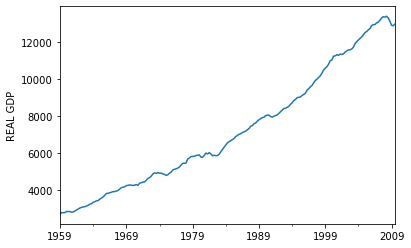

In [2]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

## Usando modelos de estatísticas para obter a tendência
<div class="alert alert-info"><h3>Função relacionada:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
O <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Filtro Hodrick-Prescott</a> separa uma série-temporal  $y_t$ em um componente de tendência $\tau_t$ e um componente ciclico $c_t$

$y_t = \tau_t + c_t$

Os componentes são determinados minimizando a seguinte função de perda quadrática, onde $\lambda$ é um parâmetro de suavização:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


O valor de $lambda$ acima lida com variações na taxa de crescimento do componente de tendência. <br>Quando se analisa os dados trimestrais, recomenda-se o valor padrão lambda de 1600. Use 6,25 para dados anuais e 129,6 mil para dados mensais.

In [3]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [4]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
                 ...    
2008-09-30    102.018455
2008-12-31   -107.269472
2009-03-31   -349.047706
2009-06-30   -397.557073
2009-09-30   -333.115243
Name: realgdp_cycle, Length: 203, dtype: float64

Vemos a partir desses números que para o período de <strong>1960-09-30</strong> a <strong>1965-06-30</strong> os valores reais ficam abaixo da linha de tendência.

In [5]:
type(gdp_cycle)

pandas.core.series.Series

In [6]:
df['trend'] = gdp_trend

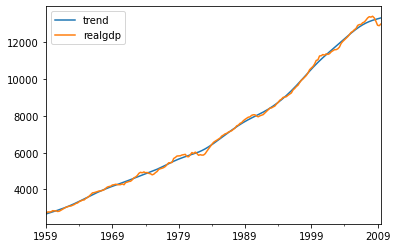

In [7]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True);

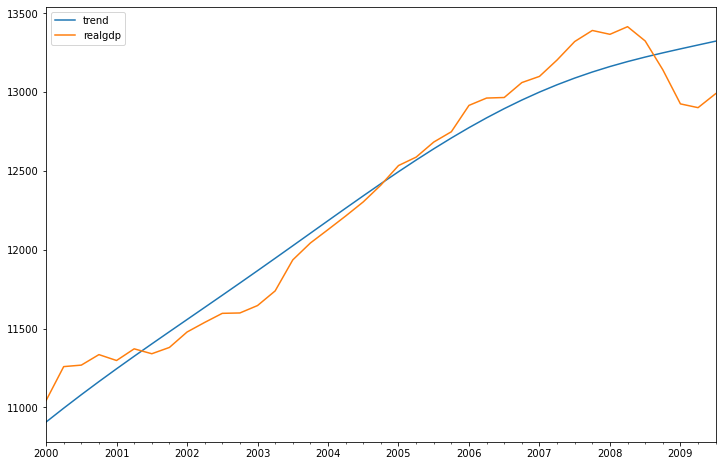

In [8]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Decomposição ETS

## ETS

## Error/Trend/Seasonality Models
À medida que começamos a trabalhar com <em>emógenos</em> dados ("endógola" para abreviar) e começamos a desenvolver modelos de previsão, ajuda a identificar e isolar fatores que trabalham dentro do sistema que influenciam o comportamento. Aqui o nome "endógeno" considera fatores internos, enquanto "exógeno" se relacionaria com forças externas. Estes se enquadram na categoria de modelos espaciais <em>estaduais</em>, e incluem <em>decomposição</em> (descrito abaixo) e <em>várcioexponente</em> (descrito em uma seção próxima).

A <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposição</a> de uma série temporal tenta isolar componentes individuais como <em>error</em>, <em>trend</em> e <em>seasonalidade</em> (ETS). Já vimos um exemplo simplista disso na <strong>Introdução aos modelos de estatísticas</strong> seção com o filtro Hodrick-Prescott. Lá separamos os dados em uma linha de tendência e uma característica cíclica que mapeou dados observados de volta à tendência.

<div class="alert alert-info"><h3>Função relacionada:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html'>statsmodels.tsa.seasonal.seasonal_decompose</a></strong><font color=black>(x, model)</font>&nbsp;&nbsp;
Decomposição sazonal usando médias móveis</tt>
<h3>Para leitura suplementar:</h3>
<strong>
<a href='https://otexts.com/fpp2/ets.html'>Previsão: Princípios e Prática</a></strong>&nbsp;&nbsp;<font color=black>Inovações afirmam modelos de espaço para suavização exponencial</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Decomposição da série temporal</font></div>

## Decomposição Sazonal
Os modelos de estatísticas fornecem uma ferramenta <em>decomposição sazonal</em> que podemos usar para separar os diferentes componentes. Isso nos permite ver de forma rápida e visual o que cada componente contribui para o comportamento geral.


Aplicamos um modelo <strong>additivo</strong> quando parece que a tendência é mais linear e os componentes de sazonalidade e tendência parecem ser constantes ao longo do tempo (por exemplo, a cada ano adicionamos 10.000 passageiros). <br>
Um modelo <strong>multiplicativo</strong> é mais apropriado quando estamos aumentando (ou diminuindo) a uma taxa não linear (por exemplo, a cada ano dobramos a quantidade de passageiros).

Para estes exemplos, usaremos o conjunto de dados International Airline Passengers, que dá totais mensais em milhares de janeiro de 1949 a dezembro de 1960.

In [9]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [10]:
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


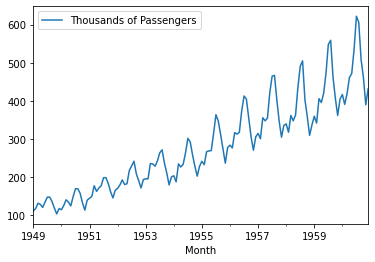

In [11]:
airline.plot();

Com base neste gráfico, parece que a tendência nos dias anteriores está aumentando a uma taxa maior do que apenas linear (embora seja um pouco difícil dizer a partir deste enredo).

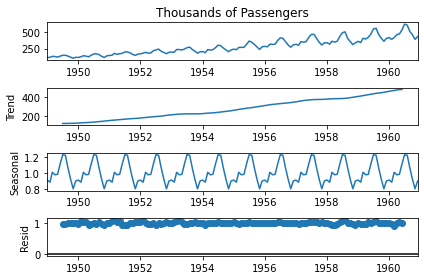

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

## EWMA - Móvel Média Exponencialmente Ponderada 

# MA (Moving Averages)
## Media Movel
Nesta seção, compararemos <em>Simple Médias-Móveis</em> com <em>Médias-Móveis-Exponenciais <em>Ponderadas</em> em termos de complexidade e desempenho.

<div class="alert alert-info"><h3>Funções Relacionadas:</h3>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=black>(window)</font>&nbsp;&nbsp;
Fornece cálculos de rolling window<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=black>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Fornece funções ponderadas exponenciais</tt></div></div>

### Realizar importações padrão e carregar o conjunto de dados
Para estes exemplos, usaremos o conjunto de dados International Airline Passengers, que dá totais mensais em milhares de janeiro de 1949 a dezembro de 1960.

In [13]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
airline.dropna(inplace=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


___
# SMA (Simple Moving Average)
## Média móvel simples

Nós já mostramos como criar uma <a href='https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average'>media movel simples</a> aplicando uma <tt>media</tt> função para uma rolling window.

Para uma revisão rápida:

In [14]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


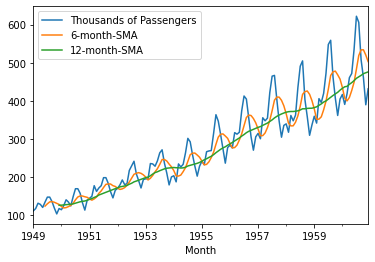

In [15]:
airline.plot();

___
# EWMA (Exponentially Weighted Moving Average)
## Média móvel exponencialmente ponderada

Acabamos de mostrar como calcular o SMA com base em alguma janela. No entanto, a SMA básica tem algumas fraquezas:
* Janelas menores levarão a mais ruído, em vez de sinal
* Ele sempre vai ficar defasado pelo tamanho da janela
* Ele nunca chegará ao pico total ou vale dos dados devido à média.
* Realmente não informa sobre um possível comportamento futuro, tudo o que realmente faz é descrever tendências em seus dados.
* Valores históricos extremos podem distorcer significativamente seu SMA

Para ajudar a corrigir alguns desses problemas, podemos usar uma <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

O EWMA nos permitirá reduzir o efeito de lag da SMA e colocará mais peso nos valores que ocorreram mais recentemente (aplicando mais peso aos valores mais recentes, assim o nome). A quantidade de peso aplicada aos valores mais recentes dependerá dos parâmetros reais utilizados no EWMA e do número de períodos dado ao tamanho da janela.
[Detalhes completos sobre matemática por trás disso podem ser encontrados aqui](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Aqui está a versão mais curta da explicação por trás do EWMA.

A fórmula para EWMA é:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Onde $x_t$ é o valor de entrada, $w_i$ é o peso aplicado (Observe como ele pode mudar de $i=0$ para $t$), e $y_t$ é a saída.

Agora a questão é, como definir o termo de peso $w_i$?

Isso depende do parâmetro <tt>ajustar</tt> que você fornece ao método <tt>.ewm()</tt>.

Quando <tt>ajustar=True</tt> (padrão) é calculado, as médias ponderadas são calculadas usando pesos iguais a $w_i = (1 - alfa)^i$

que dá

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

Quando <tt>ajustar=False</tt> é especificado, as médias móveis são calculadas como:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

que equivale ao uso de pesos:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

Quando <tt>ajustar=True</tt> temos $y_0=x_0$ e da última representação acima temos 
$y_t=\alpha x_t+(1−α)y_{t−1}$, portanto, há uma suposição de que $x_0$ não é um valor comum, mas sim um momento exponencialmente ponderado da série infinita até aquele ponto.

Para o fator de suavização $\alpha$ deve-se ter $0<\alpha≤1$, e enquanto é possível passar <em>alpha</em> diretamente, muitas vezes é mais fácil pensar sobre o <em>span</em>, <em>centro de massa</em> (com) outro <em>half-life</em> de um momento EW:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponde ao que é comumente chamado de "média móvel N-dias EW".
* <strong>Center of mass</strong> tem uma interpretação mais física e pode ser pensado em termos de extensão: $c=(s−1)/2$
* <strong>Half-life</strong> é o período de tempo para o peso exponencial para reduzir para uma metade.
* <strong>Alpha</strong> especifica o fator de suavização diretamente.

Temos que passar precisamente um dos acima para o <tt>.ewm()</tt> função. Para nossos dados vamos usar <tt>span=12</tt>.

In [17]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

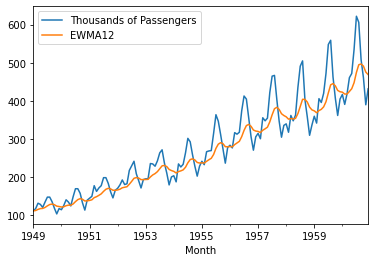

In [18]:
airline[['Thousands of Passengers','EWMA12']].plot();

## Comparando SMA com EWMA

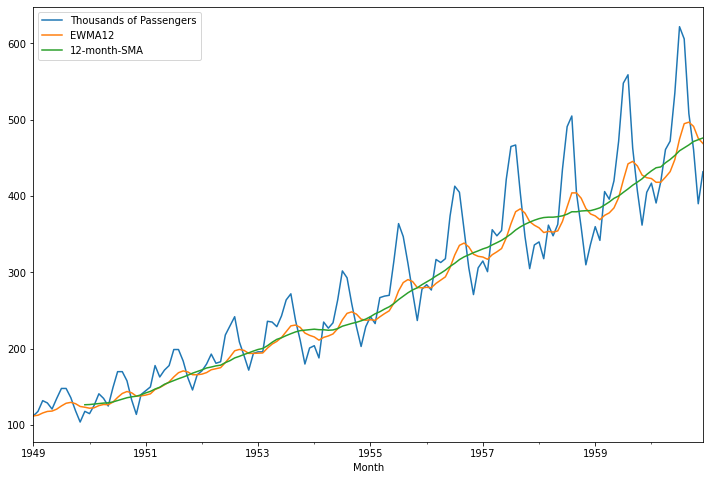

In [19]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

# FIM!!